In [1]:
# Needed to import the pyavatar folder
import os
import sys
code_path = os.path.abspath(os.path.join('..'))
if code_path not in sys.path:
    sys.path.append(code_path)

In [2]:
import numpy as np
import scipy.io
import pickle

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")
from scipy.stats.stats import pearsonr
from scipy.signal import butter, lfilter

from pyavatar.utilities import get_distance_wall, exclude_input_nodes, discard_warm_up_time, low_pass_filter

import pdb

# Explore the alpha and target space

In [3]:
import pdb
# read in results and plot
base_path = '../Output/dynamic_analysis/with_behaviour/gridsearch/testn_19/gridsearch2'
# Due to rounding problems, I am typing out the range
alpha_range = np.arange(0, .0003, .00001)
target_range = np.arange(0, .75, .05)
corr_ws = np.zeros((len(alpha_range), len(target_range)))
corr_ws_nodes = np.zeros((len(alpha_range), len(target_range)))
mean_activity = np.zeros((len(alpha_range), len(target_range)))

for ii, alpha in enumerate(alpha_range):
    pickle_path = os.path.join(base_path, 'gridsearch_%.05f.pickle' %(alpha))
    with open(pickle_path, 'rb') as fh:
        all_results = pickle.load(fh)
    for jj, target in enumerate(target_range):
        target_i = '%.02f' %target
        
        # take mean activity over time
        mean_activity[ii, jj] = np.mean(all_results[target_i]['mean_activity_over_time'])
        corr_ws[ii, jj] = all_results[target_i]['correlation_ws_mean_nodes']
        corr_ws_nodes[ii, jj] = all_results[target_i]['correlation_ws_single_nodes_mean']

## WS

 The cross function of the plot represents the mean correlation over all nodes over time. The first time plot takes the mean acivity of all nodes and correlate with the distance from the wall. Whereas the second plot, correlates the activity of each node separatly and correlate with the distance from the wall and then takes the mean. 

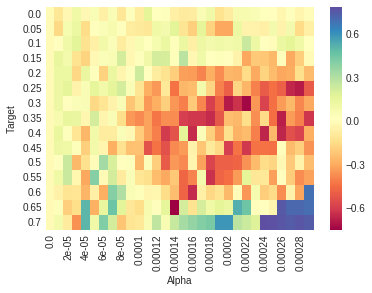

In [4]:
results6 = pd.DataFrame(corr_ws.T, index=target_range, columns=alpha_range)
heat_plt6 = sns.heatmap(results6, cmap='Spectral')
heat_plt6.set(xlabel='Alpha', ylabel='Target')
fig_heat_plt6 = heat_plt6.get_figure()

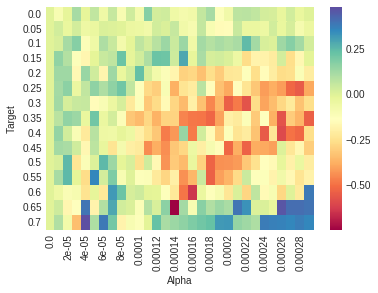

In [5]:
results7 = pd.DataFrame(corr_ws_nodes.T, index=target_range, columns=alpha_range)
heat_plt7 = sns.heatmap(results7, cmap='Spectral')
heat_plt7.set(xlabel='Alpha', ylabel='Target')
fig_heat_plt7 = heat_plt7.get_figure()

## Mean activity

The cross function shows how the mean activity changes as a function of the target and alpha

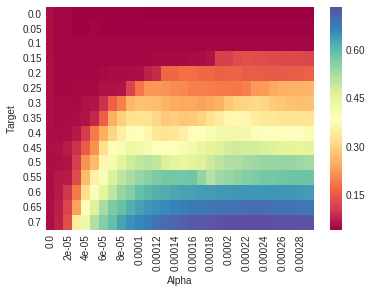

In [6]:
# plot the results
results5 = pd.DataFrame(mean_activity.T, index=target_range, columns=alpha_range)
heat_plt5 = sns.heatmap(results5, cmap='Spectral')
heat_plt5.set(xlabel='Alpha', ylabel='Target')
fig_heat_plt5 = heat_plt5.get_figure()

## Analysis of 4 different simulations

In [15]:
# Load data for 3 different simulations
path_good1 = '../Output/simulation/with_behaviour/gridsearch/testn_19/1_0.00020_0.25.mat' # Target: 2.5 and Alpha: 2e-04
path_good2 = '../Output/simulation/with_behaviour/gridsearch/testn_19/1_0.00020_0.70.mat' # Target: 0.7 and Alpha: 2e-04
path_bad1 = '../Output/simulation/with_behaviour/gridsearch/testn_19/1_0.00002_0.70.mat'   # Target: 0.7 and Alpha: 2e-05
path_bad2 = '../Output/simulation/with_behaviour/gridsearch/testn_19/1_0.00002_0.25.mat'   # Target: 2.5 and Alpha: 2e-05

In [16]:
# Process the data to exclude nodes and warm up time
sim_1 = scipy.io.loadmat(path_good1)
simulation_1 = exclude_input_nodes(sim_1)
simulation_1 = discard_warm_up_time(sim_1)

sim_2 = scipy.io.loadmat(path_good2)
simulation_2 = exclude_input_nodes(sim_2)
simulation_2 = discard_warm_up_time(sim_2)

sim_3 = scipy.io.loadmat(path_bad1)
simulation_3 = exclude_input_nodes(sim_3)
simulation_3 = discard_warm_up_time(sim_3)

sim_4 = scipy.io.loadmat(path_bad2)
simulation_4 = exclude_input_nodes(sim_4)
simulation_4 = discard_warm_up_time(sim_4)


### ws

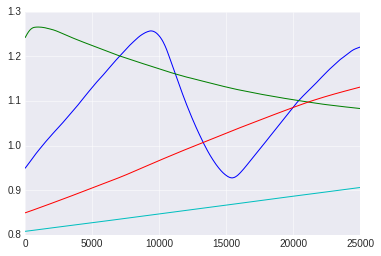

In [17]:
plt.plot(np.mean(simulation_1['ws'], axis=1))
plt.plot(np.mean(simulation_2['ws'], axis=1))
plt.plot(np.mean(simulation_3['ws'], axis=1))
plt.plot(np.mean(simulation_4['ws'], axis=1))

### Distance from the wall

In [18]:
# Get distance from the wall
cutoff = 0.6 # Hz
fs = 300 # Hz
order = 2

dd1 = get_distance_wall(simulation_1)
dd1 =low_pass_filter(cutoff, fs, order, dd1)

dd2 = get_distance_wall(simulation_2)
dd2 =low_pass_filter(cutoff, fs, order, dd2)

dd3 = get_distance_wall(simulation_3)
dd3 =low_pass_filter(cutoff, fs, order, dd3)

dd4 = get_distance_wall(simulation_4)
dd4 =low_pass_filter(cutoff, fs, order, dd4)

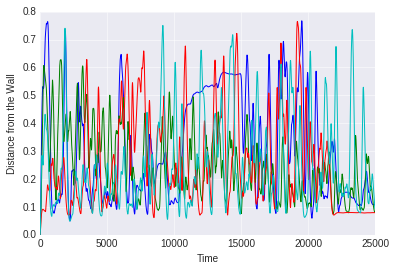

In [19]:
plt.plot(dd1)
plt.plot(dd2)
plt.plot(dd3)
plt.plot(dd4)

plt.xlabel('Time')
plt.ylabel('Distance from the Wall')

### Correlation ws and distance from the wall

In [20]:
print 'Target: 2.5 and Alpha: 2e-04' 
print pearsonr(np.mean(simulation_1['ws'], axis=1), dd1)
print 'Target: .7 and Alpha: 2e-04'
print pearsonr(np.mean(simulation_2['ws'], axis=1), dd2)
print 'Target: .7 and Alpha: 2e-05'
print pearsonr(np.mean(simulation_3['ws'], axis=1), dd3)
print 'Target: 2.5 and Alpha: 2e-05'
print pearsonr(np.mean(simulation_4['ws'], axis=1), dd4)


Target: 2.5 and Alpha: 2e-04
(-0.47686569643882698, 0.0)
Target: .7 and Alpha: 2e-04
(0.60266099459641798, 0.0)
Target: .7 and Alpha: 2e-05
(-0.071352317392912395, 1.3791741491308806e-29)
Target: 2.5 and Alpha: 2e-05
(0.17161722679832001, 1.5521332997685424e-164)


### hs

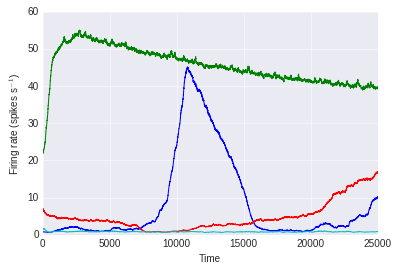

In [21]:
plt.plot(np.mean(simulation_1['hs'] * 1000, axis=1))
plt.plot(np.mean(simulation_2['hs'] * 1000, axis=1))
plt.plot(np.mean(simulation_3['hs'] * 1000, axis=1))
plt.plot(np.mean(simulation_4['hs'] * 1000, axis=1))

plt.xlabel('Time')
plt.ylabel('Firing rate (spikes s$^{-1}$)')

In [22]:
print pearsonr(np.mean(simulation_1['hs'], axis=1), dd1)
print pearsonr(np.mean(simulation_2['hs'], axis=1), dd2)
print pearsonr(np.mean(simulation_3['hs'], axis=1), dd3)
print pearsonr(np.mean(simulation_4['hs'], axis=1), dd4)

(0.3258432449243549, 0.0)
(0.42645365701591115, 0.0)
(-0.42716056315508982, 0.0)
(-0.44489524105957007, 0.0)


## ws

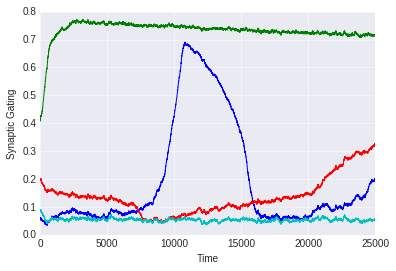

In [23]:
plt.plot(np.mean(simulation_1['xs'], axis=1))
plt.plot(np.mean(simulation_2['xs'], axis=1))
plt.plot(np.mean(simulation_3['xs'], axis=1))
plt.plot(np.mean(simulation_4['xs'], axis=1))

plt.xlabel('Time')
plt.ylabel('Synaptic Gating')